# Insights into Forest Fires

## Loading libraries

In [143]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Dataset

### Loading the dataset

The dataset can be downloaded from: https://www.kaggle.com/elikplim/forest-fires-data-set

The attributes in the dataset include:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

# Read the data

In [144]:
forest_fires = pd.read_csv('forest_fires.csv')
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Exploratory Analysis

In [89]:
# Dataset characteristics
print("Number of instances in dataset = {}".format(forest_fires.shape[0]))
print("Total number of columns = {}".format(forest_fires.columns.shape[0]))
print("Column wise count of null values:-")
print(forest_fires.isnull().sum())


Number of instances in dataset = 517
Total number of columns = 13
Column wise count of null values:-
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


### Converting the labels under month and day to integers

In [90]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

### Statistical analysis of dataset

In [91]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Corelation analysis for the dataset

In [92]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


*The correlation between month and DC is 0.86.This indicates the correlation coefficient nearer to  1 means thatfor every positive increase of temp there is positive increase of burned area 
*The correlation between RH and temp is -0.52.Here correlation coefficient tells for every positive increase in month there is negative decrease of RH(Relative humidity)

### Exploratory Visualization

### Correlation plots

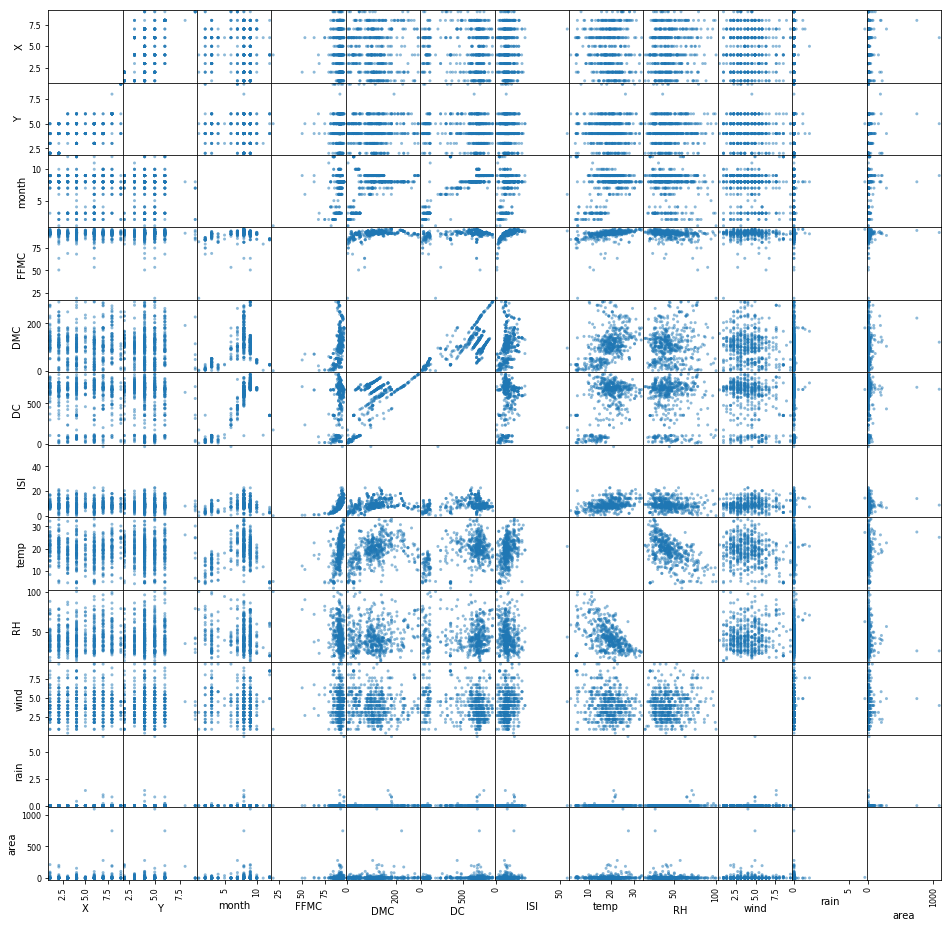

In [93]:
temp_cols=["X","Y","month","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"]
area_scatter = pd.plotting.scatter_matrix(forest_fires[temp_cols], diagonal="kwds", figsize=(16, 16))

There is no correlation between any two features

# Histogram for each column

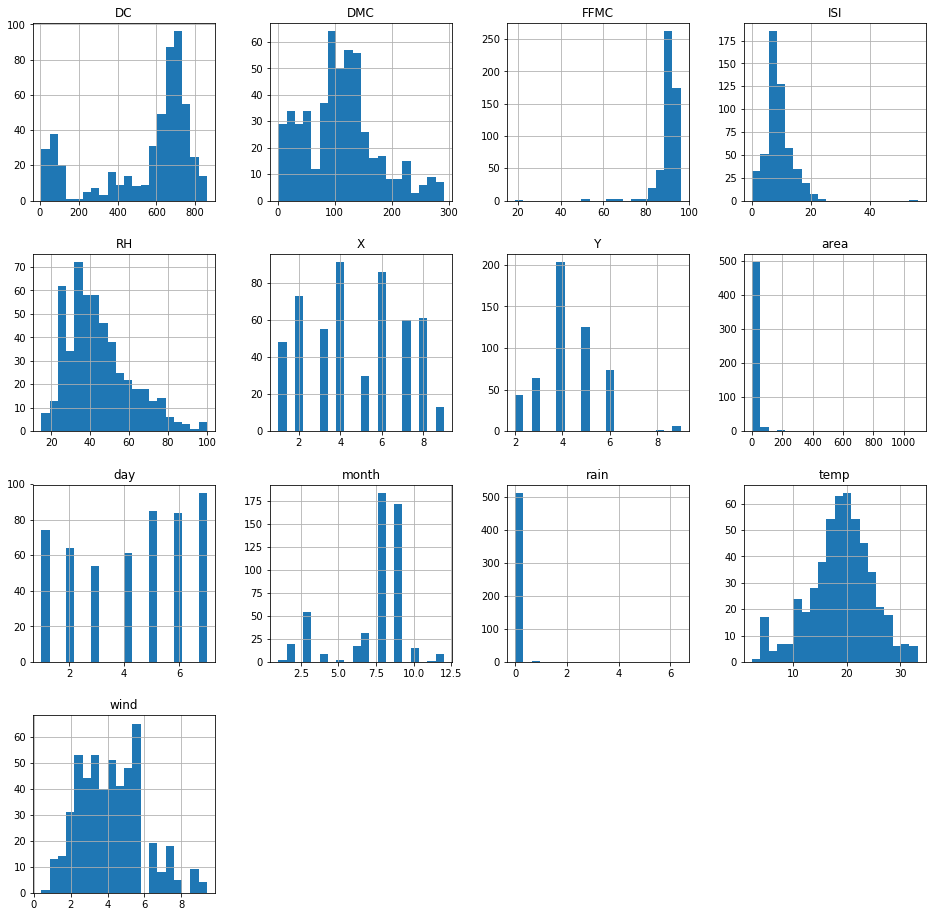

In [94]:
histograms = forest_fires.hist(figsize=(16, 16), bins=20)

It can be observed from Histograms that:-
*There is only normal distribution for temp
*There is no skewed data

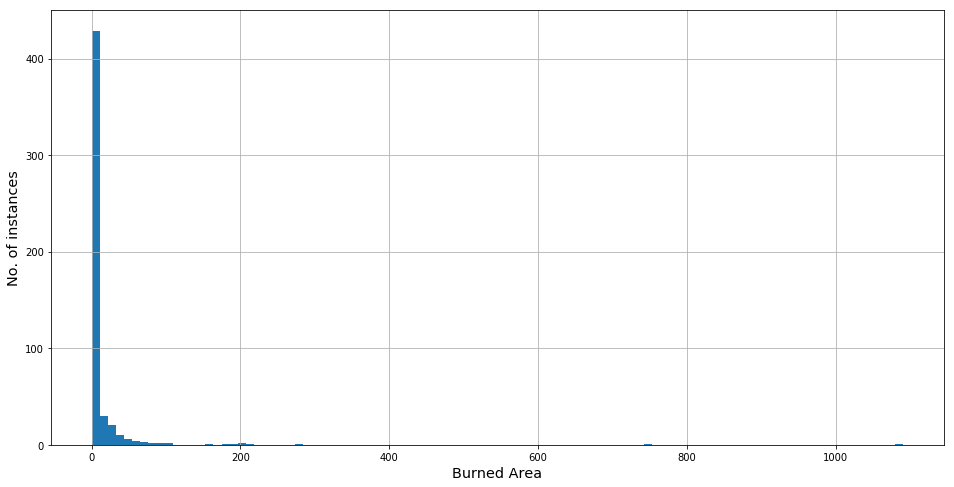

In [95]:
# Histogram for area

plt.xlabel("Burned Area", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")
forest_fires["area"].hist(figsize=(16, 8), bins=100)

Now lets us check the correlation between month and DC and RH and temp

In [96]:
# To generate all pairs for given columns
from itertools import combinations
from scipy.stats import pearsonr
for pair in combinations(forest_fires.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(forest_fires[col_1], forest_fires[col_2])
    # Check for high correlation
    if corr_coef >0.86 or corr_coef <-0.52:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : month, DC
Correlation coefficient : 0.8686977586017983
p-value : 3.0413707989438526e-159
Column pair : temp, RH
Correlation coefficient : -0.527390338637669
p-value : 2.360985626125885e-38


### Extracting features from the dataset

In [97]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [98]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [99]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [100]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

### Scatter plot for the locations

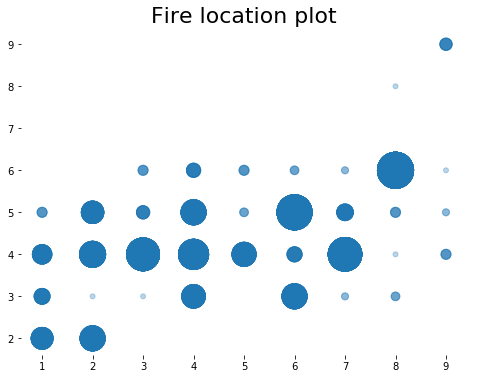

In [101]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

### Histogram plotting function for dataset

In [102]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

### Percentage of dataset with 'burned area' > 0

In [103]:
total_count = 0
positive_data_count = 0

for value in area_values:
    if(value > 0):
        positive_data_count = positive_data_count + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_data_count) + " and the total number of records are " + str(total_count) + ".")
print("The percentage value is " + str(positive_data_count/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517.
The percentage value is 52.22437137330754.


## Gaining insights with learning models

### Spilliting the available data/Setting the initial parameters

In [104]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

### Printing the actual vs predicted values

In [105]:
def print_values(test, predicted):
    print("The actual output and the predicted output are:")
    
    for value in range(0, len(predicted_y)):
        print('%.4f' % test_y[value], " ", '%.4f' % predicted_y[value])

### Linear regression model

In [106]:

linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y)**0.5)
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.71747529  2.62534697  1.19534284  1.42643221 -0.2411676   0.08588672
 -0.01211609 -0.35961031  0.62442967 -0.44664769  1.74511285 -1.58498463]

Mean squared error:  1913.2639647759793
Variance score: -0.04


### Decision tree model

In [107]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  5671.534384615384
Variance score: -2.10


### SVM model

In [108]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2039.790466031507
Variance score: -0.11


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random forest model

In [109]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean squared error:  2011.5574921150285
Variance score: -0.10


### Lasso model

In [110]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1904.4049878441558
Variance score: -0.04


### Function for generating the graph

In [111]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

### Mean squared error graph

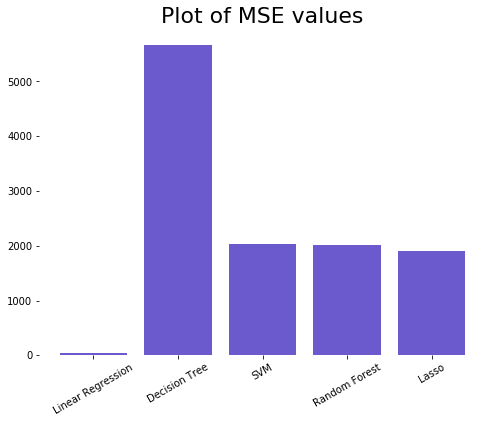

In [112]:
ticks = ["Linear Regression", "Decision Tree","SVM", "Random Forest","Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

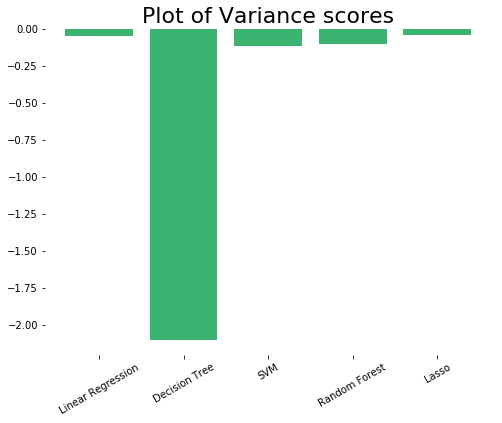

In [113]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Applying Log-Transformation to the 'burned area' variable

We can see that the errors in the prediction of burned areas from the given dataset is very high in the above mentioned model. A reason for this could be the high skewness of the 'Burned Area' variable is towards zero.

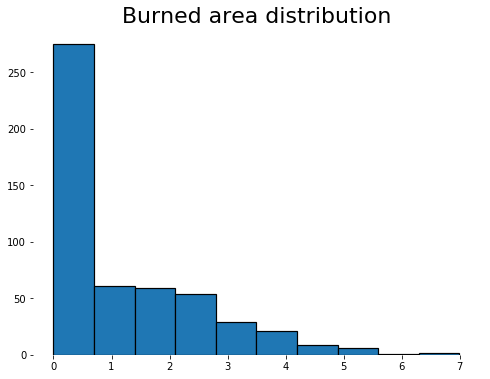

In [114]:
area_values = list(np.log(np.array(area_values) + 1))
histogram_plot(area_values, title = "Burned area distribution")

## Applying learning models on the processed data

### Setting the initial parameters

In [115]:
mse_values = []
variance_score = []

### Linear regression model

In [116]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.71747529  2.62534697  1.19534284  1.42643221 -0.2411676   0.08588672
 -0.01211609 -0.35961031  0.62442967 -0.44664769  1.74511285 -1.58498463]

Mean squared error:  1913.2639647759793
Variance score: -0.04


### Decision tree model

In [117]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  5691.044186538461
Variance score: -2.11


### SVM model

In [118]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2039.790466031507
Variance score: -0.11


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random forest model

In [119]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2031.3065704614976
Variance score: -0.11


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Lasso model

In [120]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1904.4049878441558
Variance score: -0.04


### Mean squared error graph

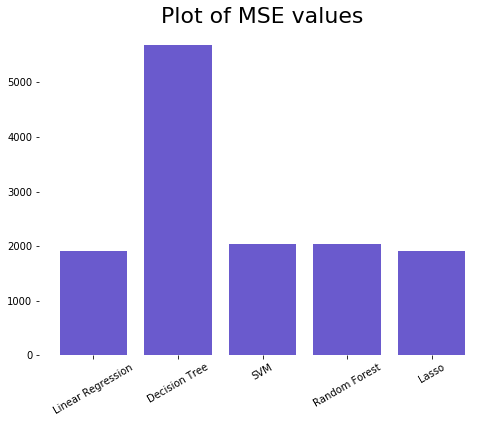

In [121]:
ticks = ["Linear Regression", "Decision Tree","SVM", "Random Forest","Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

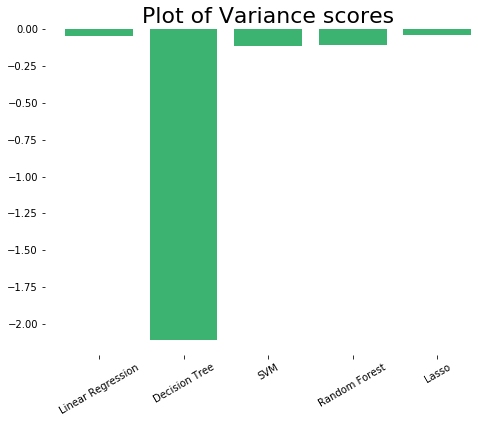

In [122]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Normalisation of all data

In [123]:
n_x_values = preprocessing.normalize([x_values])[0]
n_y_values = preprocessing.normalize([y_values])[0]

n_month_values = preprocessing.normalize([month_values])[0]
n_day_values = preprocessing.normalize([day_values])[0]

n_ffmc_values = preprocessing.normalize([ffmc_values])[0]
n_dmc_values = preprocessing.normalize([dmc_values])[0]
n_dc_values = preprocessing.normalize([dc_values])[0]
n_isi_values = preprocessing.normalize([isi_values])[0]

n_temp_values = preprocessing.normalize([temp_values])[0]
n_rh_values = preprocessing.normalize([rh_values])[0]
n_wind_values = preprocessing.normalize([wind_values])[0]
n_rain_values = preprocessing.normalize([rain_values])[0]

n_area_values = preprocessing.normalize([area_values])[0]
n_attribute_list = []

for index in range(0, len(n_x_values)):
    temp_list = []
    
    temp_list.append(n_x_values[index])
    temp_list.append(n_y_values[index])
    
    temp_list.append(n_month_values[index])
    temp_list.append(n_day_values[index])

    temp_list.append(n_ffmc_values[index])
    temp_list.append(n_dmc_values[index])
    temp_list.append(n_dc_values[index])
    temp_list.append(n_isi_values[index])

    temp_list.append(n_temp_values[index])
    temp_list.append(n_rh_values[index])
    temp_list.append(n_wind_values[index])
    temp_list.append(n_rain_values[index])
    
    n_attribute_list.append(temp_list)

## Applying learning models on the normalised data

### Setting the initial parameters

In [124]:
mse_values = []
variance_score = []

### Spilliting the available data

In [125]:
train_x, test_x, train_y, test_y = train_test_split(n_attribute_list, n_area_values, test_size=0.3, random_state = 9)

### Linear regression model

In [126]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 0.06062002  0.11191486  0.34063326  0.04497625  0.08314295  0.11997013
 -0.13438317 -0.12264177 -0.08720562 -0.30440979  0.16393813  0.02727977]

Mean squared error:  0.001426223498840591
Variance score: 0.00


### Decision tree model

In [127]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0025430073612769635
Variance score: -0.78


### SVM model

In [128]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.004579753060572858
Variance score: -2.20


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random forest model

In [129]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0018537746287305469
Variance score: -0.30


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Lasso model

In [130]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0014437638154593492
Variance score: -0.01


## Visualising the results

### Mean squared error graph

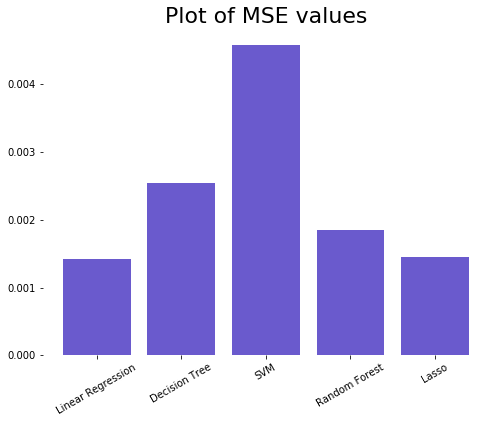

In [131]:
ticks = ["Linear Regression", "Decision Tree", "SVM", "Random Forest", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

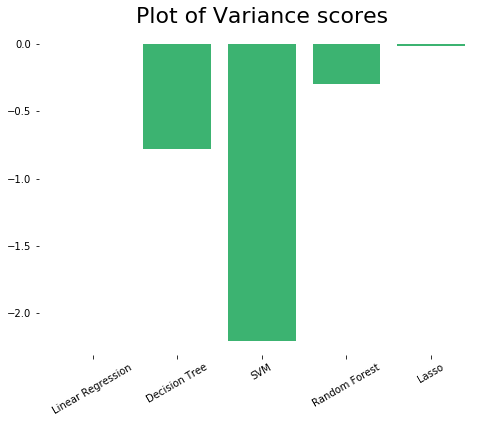

In [132]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

The next step is to try out binary classification for this problem.

## Converting the target values to binary classes

In [133]:
binary_area_values = []
count = 0

for value in area_values:
    if(value == 0):
        binary_area_values.append(0)
    else:
        binary_area_values.append(1)

## Gaining insights with classification algorithm

### Setting the initial parameters

In [134]:
accuracy_values = []

### Spilliting the available data

In [136]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, binary_area_values, test_size=0.15, random_state = 4)

### SGD model

In [137]:
sgd = linear_model.SGDClassifier()
sgd.fit(train_x, train_y)
predicted_y = sgd.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 51.28205128205128.


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Decision tree model

In [138]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 0 1]
The accuracy score is 62.82051282051282.


### Naive bayes model

In [139]:
naive_bayes = GaussianNB()
naive_bayes.fit(train_x, train_y)
predicted_y = naive_bayes.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0]
The accuracy score is 55.12820512820513.


### SVM model

In [140]:
svm_model = svm.SVC(kernel='linear', gamma=100)
svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 58.97435897435898.


### Random forest model

In [141]:
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 1]
The accuracy score is 58.97435897435898.


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Visualising the results

### Variance score graph

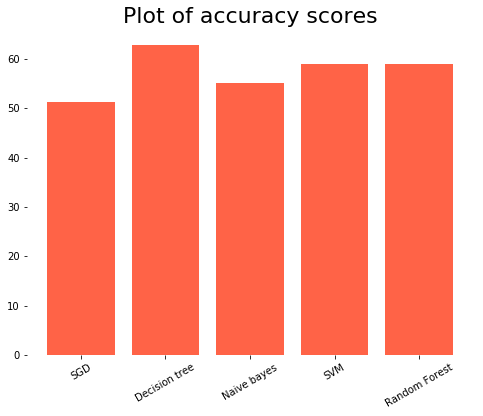

In [142]:
ticks = ["SGD", "Decision tree", "Naive bayes", "SVM", "Random Forest"]
generate_plot("Plot of accuracy scores", ticks, accuracy_values, 2)